In [53]:
import numpy as np
import pandas as pd
import datetime as dt
import os

import seaborn as sns
import matplotlib.pyplot as plt

from Graphs import graph_metric1,graph_metric2,graph_metric3

In [54]:
#importing data 

events_dict = pd.read_csv('Data input/events_dict.csv', index_col=0)
events_new = pd.read_csv('Data input/events_new.csv', index_col=0)
payments = pd.read_csv('Data input/Payments.csv', index_col=0)

## Data Cleaning + EDA -----------------

In [23]:
#chaning the name of id column to match it with events df 

events_dict.rename(columns={'id':'event_id'}, inplace=True)
events_dict

#IL - introductory lesson
#DL - demonstration lesson
#1L - first line
#2L - second line
#WA - whatsapp message 
#S. - student 

,index,name,event_id,description
0,0,student_created_order,3,Creating an application
1,497,student_booked_introlesson,2,Assigning an IL
2,934,student_pass_introlesson_succesfully,7,Successful IL
3,956,firstline_operator_assigned_at_task,8,Assigned task to call 1L
4,1007,secondline_operator_assigned_at_task,12,Assigned task to call 2L
5,1227,student_answered_firstline_operator,4,S. answered 1L operator call
6,1619,methodist_joined_introlesson,6,DL to IL
7,1715,student_passed_demolesson,11,DL completed
8,1801,student_answered_secondline_operator,9,Call 2L
9,2014,student_joined_demolesson,10,Transfer to DL (DL started)


In [55]:
#changing date column type 
events_new['happened_at'] = pd.to_datetime(events_new['happened_at'])
#extracting only date(without time)
events_new['happened_date'] = events_new['happened_at'].apply(lambda x: x.date())

events_new

,event_id,user_id,happened_at,happened_date
0,3,12367366,2021-06-01 17:30:28,2021-06-01
1,3,12467855,2021-06-16 14:05:31,2021-06-16
2,3,12382388,2021-06-03 17:02:48,2021-06-03
3,3,12450855,2021-06-14 07:52:48,2021-06-14
4,3,12451213,2021-06-14 09:29:38,2021-06-14
...,...,...,...,...
361683,12,12444620,2022-01-02 18:48:04,2022-01-02
361684,12,12446919,2021-06-13 19:23:49,2021-06-13
361685,12,12447020,2021-06-29 15:49:06,2021-06-29
361686,12,12447020,2021-06-13 18:39:58,2021-06-13


In [56]:
#changing date column type 
payments['transaction_created_at'] = pd.to_datetime(payments['transaction_created_at'])
#extracting only date(without time)
payments['transaction_date'] = payments['transaction_created_at'].apply(lambda x: x.date())
payments

,transaction_id,transaction_created_at,user_id,currency,amount,is_gift,transaction_date
0,3807046,2021-05-16 03:41:25,12242732,RUB,390.0,False,2021-05-16
1,3807613,2021-05-16 11:06:23,12241834,RUB,7980.0,False,2021-05-16
2,3807673,2021-05-16 11:33:06,12241501,RUB,24880.0,False,2021-05-16
3,3810405,2021-05-17 09:45:40,12242141,RUB,8520.0,False,2021-05-17
4,3811432,2021-05-17 13:35:35,12251367,RUB,14360.0,False,2021-05-17
...,...,...,...,...,...,...,...
69798,5149192,2022-03-07 13:39:19,12277154,RUB,8994.0,False,2022-03-07
69799,5189623,2022-03-13 10:40:42,12321417,RUB,8240.0,False,2022-03-13
69800,5190224,2022-03-13 12:02:43,12390963,RUB,3560.0,False,2022-03-13
69801,5190985,2022-03-13 13:26:52,12420449,RUB,390.0,False,2022-03-13


Missing values and duplicates :

In [26]:
events_new.isnull().sum()

event_id         0
user_id          0
happened_at      0
happened_date    0
dtype: int64

In [27]:
payments.isnull().sum()

transaction_id            0
transaction_created_at    0
user_id                   0
currency                  0
amount                    0
is_gift                   0
transaction_date          0
dtype: int64

In [28]:
#checking for duplicates in events 

dupl_cols = ['event_id', 'user_id', 'happened_at']

mask = events_new.duplicated(subset=dupl_cols)

event_duplt = events_new[mask]

print(f'Number of records: {events_new.shape[0]}')

print(f'Number of duplicates: {event_duplt.shape[0]}')


Number of records: 361688
Number of duplicates: 4003


In [29]:
event_duplt

,event_id,user_id,happened_at,happened_date
1119,4,12251151,2021-06-08 14:59:44,2021-06-08
1642,4,12391289,2021-06-04 22:12:47,2021-06-04
1675,4,12272783,2021-07-08 21:02:59,2021-07-08
1679,4,12275418,2022-03-02 13:52:40,2022-03-02
1680,4,12275418,2022-03-02 13:52:40,2022-03-02
...,...,...,...,...
361583,9,12287275,2021-05-24 19:02:00,2021-05-24
361587,9,12289663,2021-05-23 14:49:54,2021-05-23
361590,9,12290050,2021-11-09 16:55:59,2021-11-09
361656,9,12485485,2021-11-23 12:43:44,2021-11-23


The rows with the same event_id, user_id and happened_at seem to be the duplicates as user. As in example below user can't answer the call(event_id = 4) two times at the same time:

In [59]:
#example of possible duplicated values 
events_new[(events_new['user_id'] == 12272783) & (events_new['event_id'] == 4)]

,event_id,user_id,happened_at,happened_date
1674,4,12272783,2021-07-08 21:02:59,2021-07-08
1675,4,12272783,2021-07-08 21:02:59,2021-07-08


In [31]:
#deliting duplicates 
events_new = events_new.drop_duplicates(subset=dupl_cols)

print(f'Number of records after: {events_new.shape[0]}')

Number of records after: 357685


In [32]:
#checking for duplicates in payment
 
dupl_cols = ['transaction_created_at', 'transaction_id', 'currency', 'user_id', 'amount', 'is_gift']

mask = payments.duplicated(subset=dupl_cols)
pay_dupl = payments[mask]

print(f'Number of records: {payments.shape[0]}')

print(f'Number of duplicates: {pay_dupl.shape[0]}')


Number of records: 69803
Number of duplicates: 0


Timeframe of the data

In [33]:
print(events_new['happened_date'].min())
print(events_new['happened_date'].max())

2018-05-28
2022-03-14


Number of unique users in df:

In [34]:
events_new['user_id'].nunique()

84306

Number of unique students who made a transaction at least once:

In [35]:
payments['user_id'].nunique()

18236

Type of currencies: 

In [37]:
print(payments['currency'].unique())
print(f'Number of currencies: {len(payments["currency"].unique())}')

['RUB' 'EUR' 'GBP' 'PLN' 'USD' 'JPY' 'CLP' 'KRW' 'PEN' 'UAH' 'MXN' 'UYU']
Number of currencies: 12


Checking the CJM for all unique customers:

In [38]:
#count of all unique events 
event_desc = events_new.groupby(['event_id'], as_index=False).nunique().loc[:,['event_id','user_id']]

#getting desctiption for events and join it with count of these events 
event_dic_extr = events_dict.loc[:,['event_id','description']]
event_desc_unique = pd.merge(event_dic_extr, event_desc, on = 'event_id', how='left').sort_values('user_id',ascending=False)

event_desc_unique

,event_id,description,user_id
0,3,Creating an application,84116
3,8,Assigned task to call 1L,51034
1,2,Assigning an IL,46456
5,4,S. answered 1L operator call,44990
6,6,DL to IL,22981
2,7,Successful IL,19770
8,9,Call 2L,14785
4,12,Assigned task to call 2L,14560
10,5,WA message sent,695
9,10,Transfer to DL (DL started),396


The obtained data coincide quite well with the information about a typical sales funnel. Creating an application(3) --> S. answered the call (4) --> Successful IL (7) or DL (11) 

## Metrics -----------------

In [39]:
#functiong for formating graphs
def to_percent(y, _):
    return f'{int(y)}%'

def format_thousands(x,pos):
    return f'{x/1000:.0f}'

The first metric that can be calculated is CCR or customer conversion rate. Let's calculate it on daily basis: 

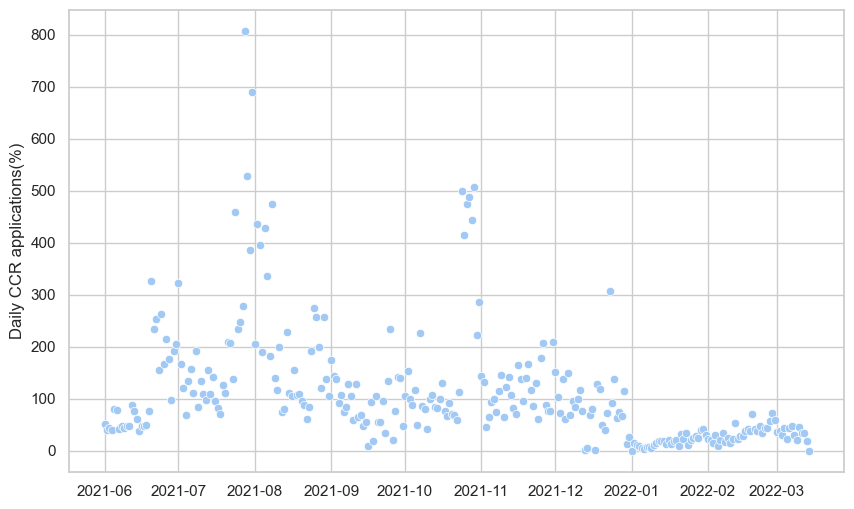

In [41]:
#coding wanted events 
app = [3] #creating application 
call = [4,13] #responded to call or WA message 

sns.set_theme(style="whitegrid", palette="pastel")

events_new.loc[:, 'is_app'] = events_new['event_id'].apply(lambda x: 1 if x in app else 0)
events_new.loc[:, 'is_call'] = events_new['event_id'].apply(lambda x: 1 if x in call else 0)

events_daily = events_new.drop(['happened_at','event_id'],axis = 1).groupby(['happened_date'],as_index=False).sum().sort_values('happened_date')

events_daily['CCR_app(%)'] = np.where(events_daily['is_app'] == 0, 0, round(events_daily['is_call']/events_daily['is_app']*100,2))

events_daily = events_daily[events_daily['happened_date'] >= dt.date(2021,6,1)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='happened_date', y='CCR_app(%)', data=events_daily)
plt.xlabel('')
plt.ylabel('Daily CCR applications(%)')
plt.title('')
plt.show()

* It seems like it's not the best metric as it takes longer time for each step in CJM (that's why there are many figures bigger than 100%). That's why better metric will be cumulative convertion rate

* The second metric will be active daily users or DUA

* The third is daily revenue (in Russian rubbles)

## Calculating Metrcis ------------------

First step is creating df with date and each metric for this day (ideally is to have database somewhere else and add a new line there every day) but for the this project it will be enough


In [60]:
def metrcics(data_e, data_p, min, max):
    
    diff = (max - min).days
    
     #creating dataframe
    df_metrics = pd.DataFrame()
    
    for i in range(0,diff+1):
        
        rep_date = min + dt.timedelta(days=i)

        #filtering the event df 
        event_filterd = data_e[data_e['happened_date']<=rep_date]
        #unqiue count of users by event
        group_ev = event_filterd.groupby(['event_id'], as_index=False).nunique().loc[:,['event_id','user_id']]
        
        ##filtering the payment df
        filtered_pay = data_p[data_p['transaction_date'] <= rep_date]
        filtered_pay_RUB_filterd = data_p[(data_p['transaction_date'] == rep_date) & (data_p['currency'] == 'RUB')]
        
        new_row = {'happened_date':rep_date,
                   'app_cum' : group_ev['user_id'].values[1],  #value for unique application
                   'call_cum' :group_ev['user_id'].values[2] + group_ev['user_id'].values[11],  #user responded (2 - call or 11 - whats up)
                   'intro_cum': group_ev['user_id'].values[5] + group_ev['user_id'].values[9],  #successful introductory or demonstration lesson 
                   'pay_cum' : filtered_pay['user_id'].nunique(), # unique number of users who paid
                   'daily_revenue': filtered_pay_RUB_filterd['amount'].sum()
                   }
        
        df_metrics = pd.concat([df_metrics, pd.DataFrame([new_row])], ignore_index = True)
    
        #calculating the 1st metric: 
        
        df_metrics['CCR_app(%)'] = round(df_metrics['call_cum']/df_metrics['app_cum']*100,2) 
        df_metrics['CCR_call(%)'] = round(df_metrics['intro_cum']/df_metrics['call_cum']*100,2) 
        df_metrics['CCR_intro(%)'] = round(df_metrics['pay_cum']/df_metrics['intro_cum']*100,2)
        
        #number of users who filled the application 
        df_metrics['DAU_request'] = df_metrics['app_cum'] - df_metrics['app_cum'].shift()
        df_metrics['Daily_revenue_VarRel(%)'] = round((df_metrics['daily_revenue'] - df_metrics['daily_revenue'].shift())/df_metrics['daily_revenue'].shift()*100,2)
        
        #saving data to seperate folder
        output_folder = 'Data output'  
        output_file_name = 'METRICS.csv'
        output_file_path = os.path.join(output_folder, output_file_name)
        
        df_metrics.to_csv(output_file_path, index=False)

    return(df_metrics)

For this particula example let's create small sample of the df with time interval of approximately 2 weeks: 

In [61]:
min = dt.date(2022, 3, 1)
max = dt.date(2022, 3, 13)

metrics_df = metrcics(events_new,payments, min,max)

In [46]:
metrics_df

,happened_date,app_cum,call_cum,intro_cum,pay_cum,daily_revenue,CCR_app(%),CCR_call(%),CCR_intro(%),DAU_request,Daily_revenue_VarRel(%)
0,2022-03-01,84059,44937,19970,18184,1393947.0,53.46,44.44,91.06,NaN,NaN
1,2022-03-02,84063,44947,19974,18188,1108858.0,53.47,44.44,91.06,4.0,-20.45
2,2022-03-03,84071,44956,19976,18192,1464322.0,53.47,44.43,91.07,8.0,32.06
3,2022-03-04,84075,44962,19977,18193,1745068.0,53.48,44.43,91.07,4.0,19.17
4,2022-03-05,84082,44967,19979,18195,887964.0,53.48,44.43,91.07,7.0,-49.12
5,2022-03-06,84084,44972,19980,18197,841438.0,53.48,44.43,91.08,2.0,-5.24
6,2022-03-07,84089,44980,19984,18200,1508456.0,53.49,44.43,91.07,5.0,79.27
7,2022-03-08,84092,44986,19985,18205,1129025.0,53.50,44.42,91.09,3.0,-25.15
8,2022-03-09,84097,44992,19989,18210,3212223.0,53.50,44.43,91.10,5.0,184.51
9,2022-03-10,84102,45008,19990,18215,3187560.0,53.52,44.41,91.12,5.0,-0.77


Graphs:

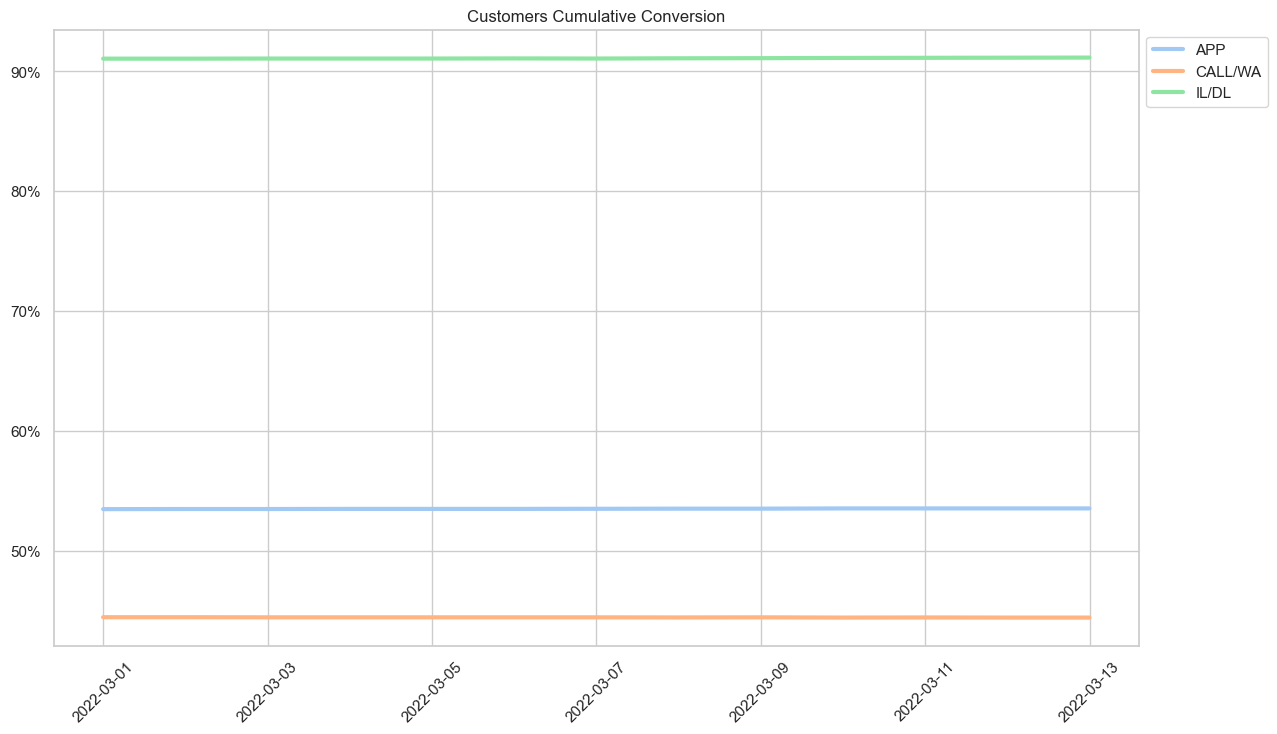

In [62]:
graph_metric1(metrics_df)

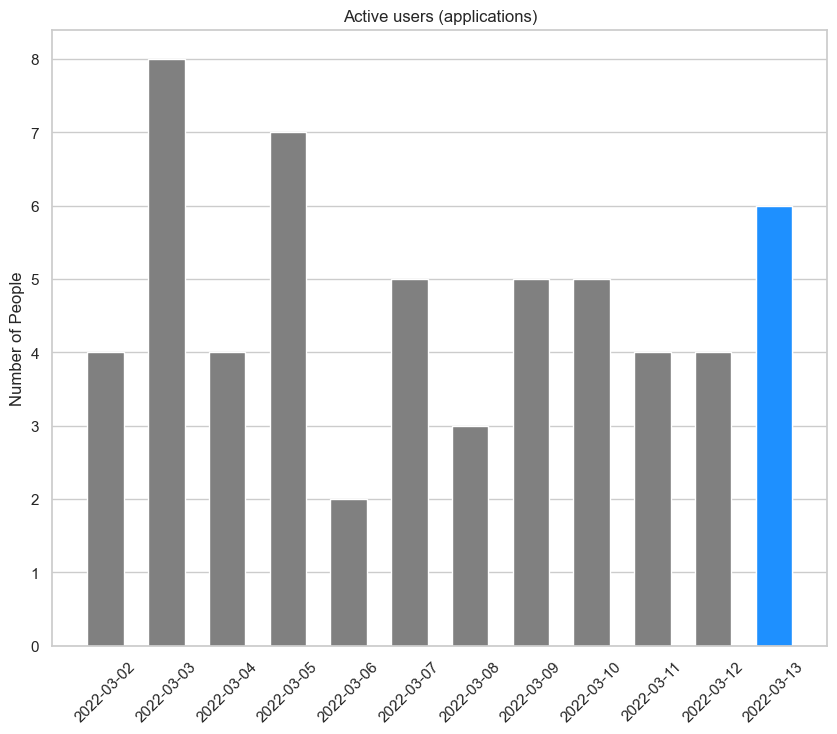

In [63]:
graph_metric2(metrics_df)

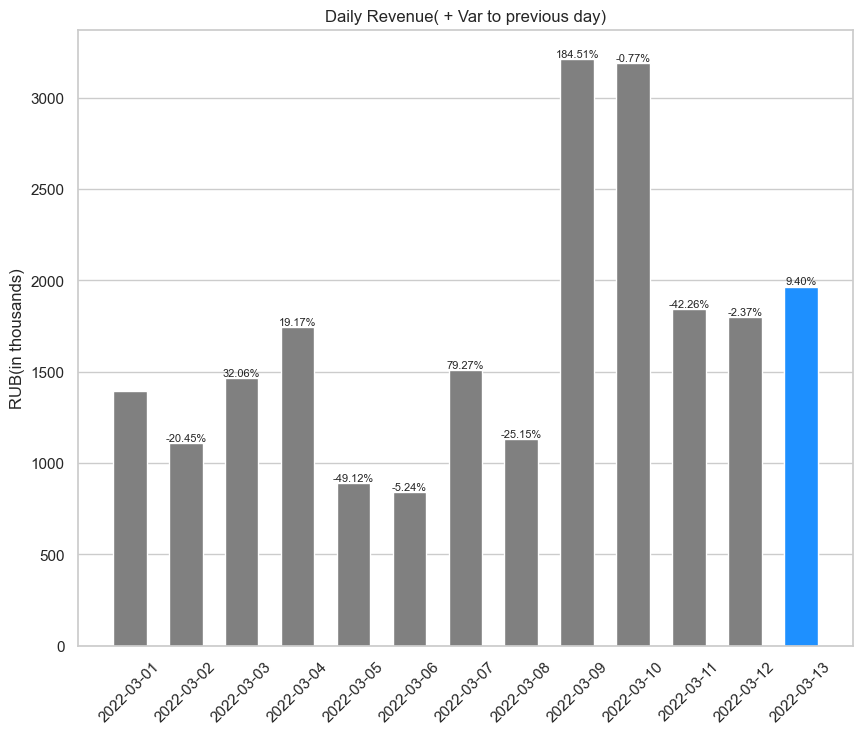

In [64]:
graph_metric3(metrics_df)